In [73]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

def airy(x,phi0=phi0,beta=1,m=50):
    f = lambda x: beta/(1+m*np.sin(x+phi0)**2)
    return f(x) - f(0)

Text(0.5,1,'$\\Phi_0$ = -0.67 (solitons exist)')

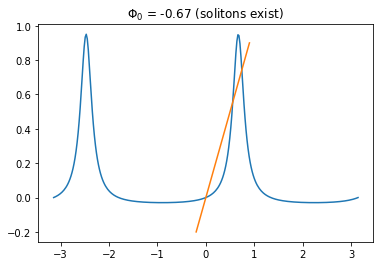

In [74]:
phi0 = -0.67
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs, phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (solitons exist)' % phi0)

Text(0.5,1,'$\\Phi_0$ = -0.59 (chimera left boundary)')

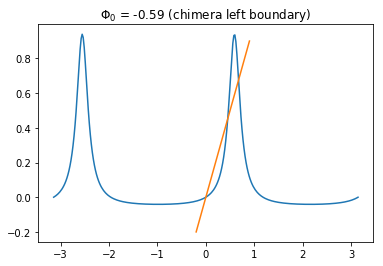

In [75]:
phi0 = -0.59
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs, phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (chimera left boundary)' % phi0)

Text(0.5,1,'$\\Phi_0$ = -0.35 (transcritical bifurcation)')

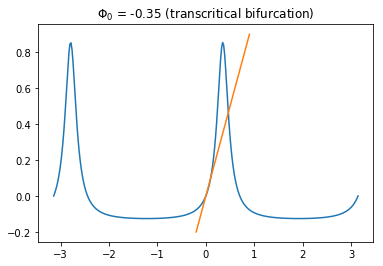

In [76]:
phi0 = -0.35
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs,phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (transcritical bifurcation)' % phi0)